In [1]:
import cooler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath005 = 'predict005.txt.cool'
filepath_Act = 'GM12878_combined_0.05.mcool::/resolutions/10000'

In [3]:
c005 = cooler.Cooler(filepath005)
cAct = cooler.Cooler(filepath_Act)

In [4]:
c005.info

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2020-10-26T18:33:58.032000',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.5',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 272564,
 'nchroms': 21,
 'nnz': 874979,
 'storage-mode': 'symmetric-upper',
 'sum': 3782826}

In [5]:
cAct.info

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2020-10-27T03:02:21.979963',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/4dn-dcic/hic2cool',
 'format-version': 3,
 'generated-by': 'hic2cool-0.8.3',
 'genome-assembly': 'hg19',
 'nbins': 309581,
 'nchroms': 25,
 'nnz': 142435315,
 'software': 'Juicer Tools Version 1.7.6',
 'storage-mode': 'symmetric-upper'}

In [6]:
cAct.bins()[:][cAct.bins()[:]['chrom']=='19']

,chrom,start,end,KR,VC,VC_SQRT
265953,19,0,10000,NaN,0.000000,0.000000
265954,19,10000,20000,NaN,0.000000,0.000000
265955,19,20000,30000,NaN,0.000000,0.000000
265956,19,30000,40000,NaN,0.000000,0.000000
265957,19,40000,50000,NaN,0.000000,0.000000
...,...,...,...,...,...,...
271861,19,59080000,59090000,1.275311,1.410458,1.152994
271862,19,59090000,59100000,1.021880,1.033463,0.986949
271863,19,59100000,59110000,0.353195,0.304345,0.535587
271864,19,59110000,59120000,0.184048,0.115847,0.330438


In [7]:
c005.bins()[:][c005.bins()[:]['chrom']=='chr19']

,chrom,start,end
240141,chr19,0,10000
240142,chr19,10000,20000
240143,chr19,20000,30000
240144,chr19,30000,40000
240145,chr19,40000,50000
...,...,...,...
246280,chr19,61390000,61400000
246281,chr19,61400000,61410000
246282,chr19,61410000,61420000
246283,chr19,61420000,61430000


In [8]:
arrAct = cAct.matrix(balance=False)[265953:271865, 265953:271865]
arrAct

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 261,  36,   7],
       [  0,   0,   0, ...,  36,  37,   6],
       [  0,   0,   0, ...,   7,   6,  20]], dtype=int32)

In [9]:
arr005 = c005.matrix(balance=False)[240141:246053, 240141:246053]
arr005

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


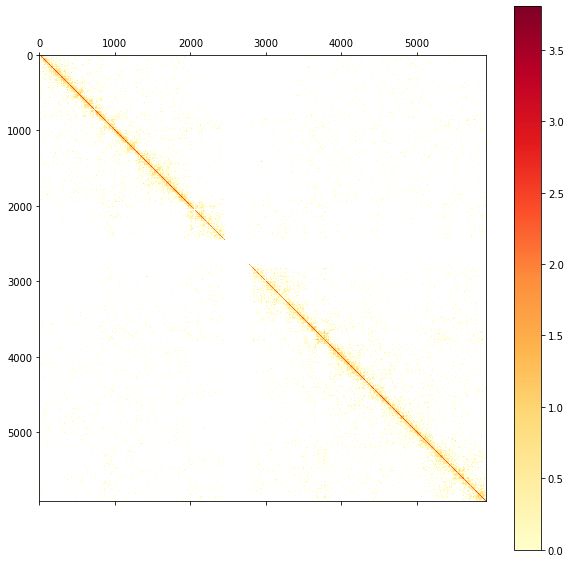

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arrAct), cmap='YlOrRd')
fig.colorbar(im)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


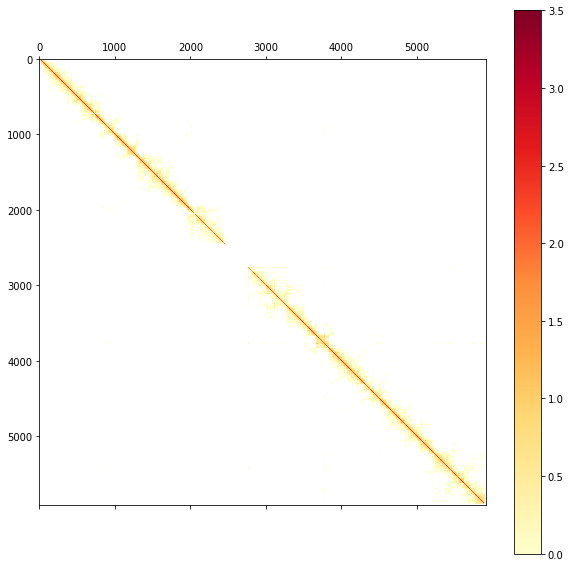

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr005), cmap='YlOrRd')
fig.colorbar(im)